# Table of contents
## 1. Basics
### 1.1 [Import Section](#imports)
### 1.2 [Numpy](#numpy)
### 1.3 [Matplotlib](#plotly)
## 2. [Deep Learning](#deep)
### 2.1 [Convolutional Layers](#convolution)
#### 2.1.1 [Loading a model](#load)
### 2.2 [Recurrent Layers](#recurrent)
### 2.3 [Dense Layers](#dense)

## Basics
This section will cover the basics of a jupyter notebook
### Import section<a name="imports">

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
# Loads CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Numpy<a name='numpy'>
This is a package that handles vectors in parallel. Useful for fasat operations with lists and matrixes.

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_images.mean(), train_images.std(), train_images.max(), train_images.min()

(0.4733630004850874, 0.25156892506322026, 1.0, 0.0)

In [7]:
train_images.shape

(50000, 32, 32, 3)

### Matplotlib <a name='plotly'>
We need a function to change the numeric labels of Y to actual string

In [8]:
dictionary_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

We can use a function or a lambda function.

In [9]:
F = lambda x: dictionary_labels[x[0]]
def transform_labels(number):
    return dictionary_labels[number[0]]

In [10]:
labels_train = np.apply_along_axis(F, 1, train_labels)

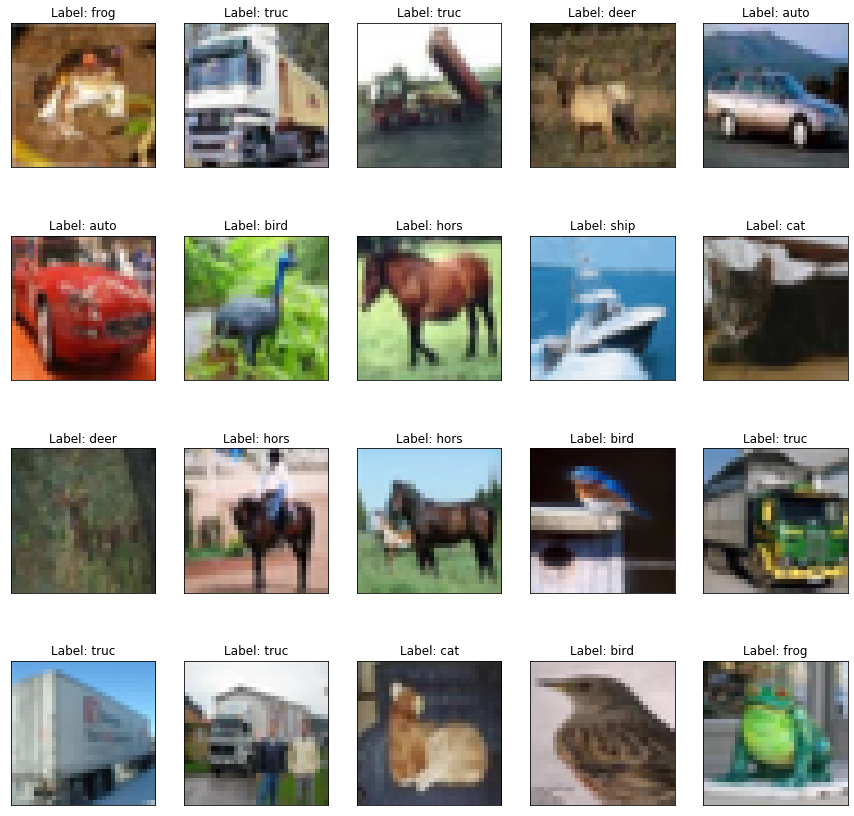

In [11]:
fig, axs = plt.subplots(4,5)
axs = axs.flatten()

plot_index = 0
for ax in axs:
    ax.imshow(train_images[plot_index])
    ax.set_title(f'Label: {labels_train[plot_index]}')
    ax.set_xticks([])
    ax.set_yticks([])
    plot_index += 1
    fig.set_size_inches(15,15)

## Deep Learning <a name="deep">
Neural networks have many different types of layers, but the main three are recurrent, convolutional and dense.

### Convolutional <a name="convolutional">
The convolutional layers are mainly used for image processing given that these layers use kernel (matrixes) to capture relationships betwwen far apart elements of the input, in case of pictures pixels.

In [29]:
# Structure of the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(train_images.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)          9248      
__________

In [31]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

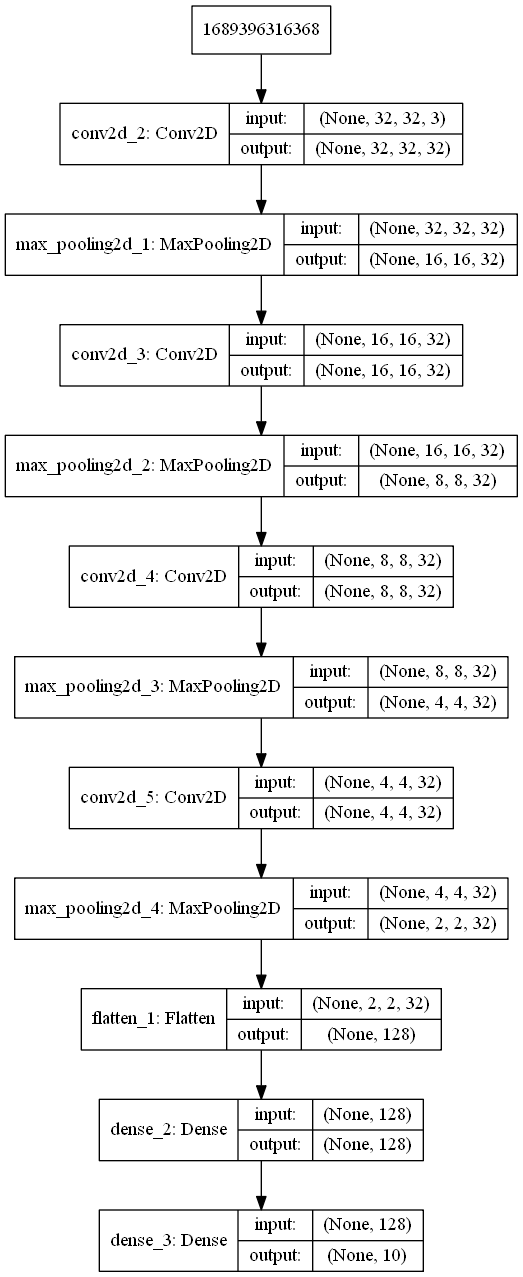

In [32]:
from IPython.display import Image
Image(filename='model_plot.png') 

But our test data does not have the shape 10 at then end. We have to One-hot-encode it. That means create a vector of size 10 with zeros in every position except from the position that belongs to the label.

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [37]:
history = model.fit(
    x=train_images, 
    y=train_labels, 
    validation_data=(test_images, test_labels), 
    verbose=2, 
    callbacks=[early_stopping], 
    epochs=30,
    batch_size=500,
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.7850 - acc: 0.7242 - val_loss: 0.9519 - val_acc: 0.6705
Epoch 2/30
 - 6s - loss: 0.7900 - acc: 0.7199 - val_loss: 0.9440 - val_acc: 0.6660
Epoch 3/30
 - 6s - loss: 0.7688 - acc: 0.7281 - val_loss: 0.9291 - val_acc: 0.6820
Epoch 4/30
 - 6s - loss: 0.7520 - acc: 0.7356 - val_loss: 0.9905 - val_acc: 0.6585
Epoch 5/30
 - 6s - loss: 0.7398 - acc: 0.7409 - val_loss: 0.9303 - val_acc: 0.6850
Epoch 6/30
 - 6s - loss: 0.7311 - acc: 0.7423 - val_loss: 0.9301 - val_acc: 0.6849


In [39]:
convolutional_path = 'convolutional_example.h5'
model.save(convolutional_path)

In [40]:
def get_predicted_labels(prediction):
    max_value = 0
    max_index = 0
    for i in range(len(prediction)):
        if prediction[i]>max_value:
            max_value = prediction[i]
            max_index = i
    return dictionary_labels[max_index]
G = lambda x: get_predicted_labels(x)

In [41]:
predictions = model.predict(test_images)
labels_test = np.apply_along_axis(F, 1, test_labels)
labels_predictions = np.apply_along_axis(G, 1, predictions)

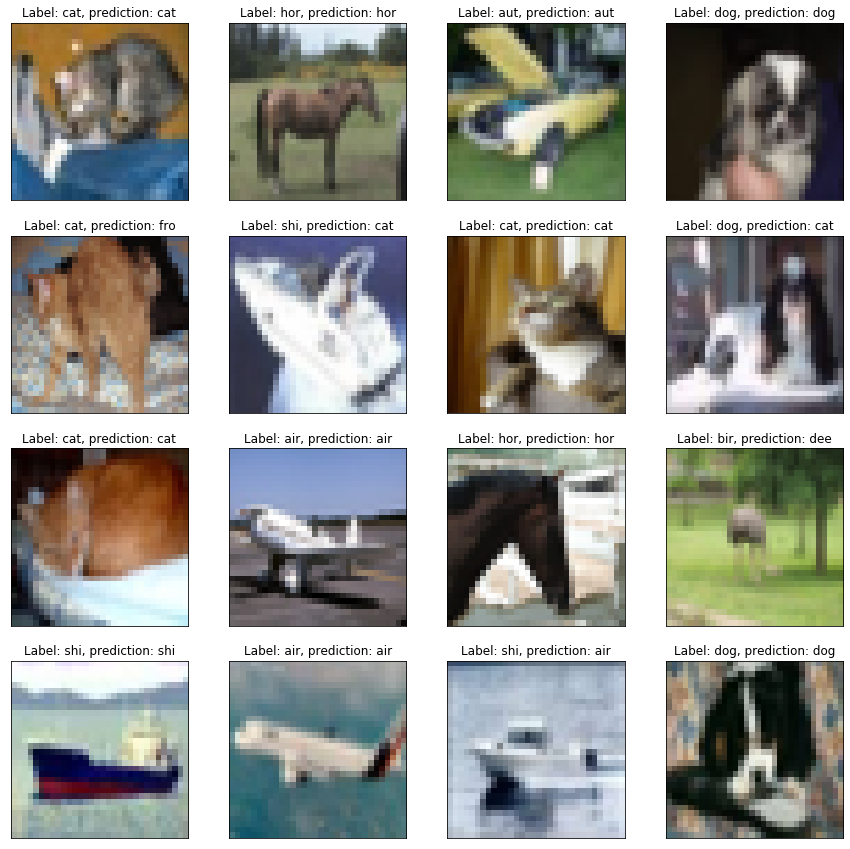

In [42]:
fig, axs = plt.subplots(4,4)
axs = axs.flatten()

plot_index = 0
for ax in axs:
    ax.imshow(test_images[-plot_index])
    ax.set_title(f'Label: {labels_test[-plot_index]}, prediction: {labels_predictions[-plot_index]}')
    ax.set_xticks([])
    ax.set_yticks([])
    plot_index += 1
    fig.set_size_inches(15,15)

 - 1s - loss: 0.9301 - acc: 0.6849


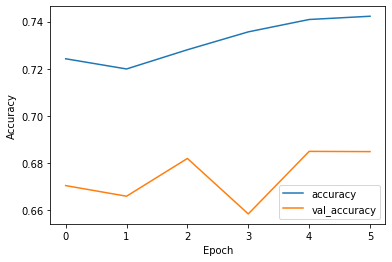

In [38]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


Text(0, 0.5, 'Counts')

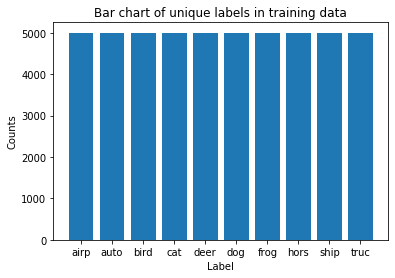

In [39]:
unique, counts = np.unique(labels_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Bar chart of unique labels in training data')
plt.xlabel('Label')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

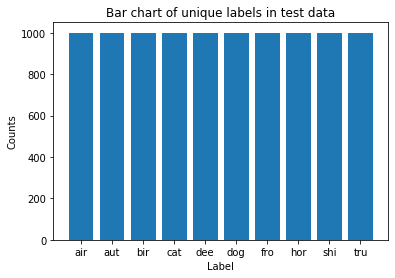

In [40]:
unique, counts = np.unique(labels_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Bar chart of unique labels in test data')
plt.xlabel('Label')
plt.ylabel('Counts')

#### Loading a model <a name="load">

In [23]:
model = tf.keras.models.load_model(convolutional_path)

In [24]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.9790 - acc: 0.6825


[0.9790421175956726, 0.6825]

## Recurrent Network <a name="recurrent">
These networks are commonly used for time series data. The difference with the other layers is that these networks use the input and output of the previous layer as the output of the next. Therefore, can mantain a relation between the different levels of the network. There are subkinds of recurrent layers, like GRU and LSTM. These layers add more complex "gates" that allow the network to have very long sequences without having vanishing or exploding gradients.

In [23]:
from sklearn.preprocessing import MinMaxScaler
import os
import keras as k
df_colombia = pd.read_excel("Datasets/Currency/PesoCol.xlsx", names=['Date','Euro','Rate'])
df_colombia.head()

,Date,Euro,Rate
0,01/02/2018,3535.87436,2835.05
1,02/02/2018,3490.93614,2806.67
2,03/02/2018,3522.60329,2832.13
3,04/02/2018,3522.60329,2832.13
4,05/02/2018,3517.78867,2832.13


In [12]:
def build_sequences(data, window_size, target_distance):
    inputs = []
    targets = []
    for i in range(len(data)-(window_size+target_distance)):
        inputs.append(data[i:i+window_size])
        targets.append(data[i+window_size+target_distance]) # Tight now it takes the target being certain days ahead. 
        # A different approach could be to do spaced TS. Every two days to forecast two days ahead in time.
    return np.array(inputs), np.array(targets)
def build_sequences_separation(data, window_size, target_distance, separation):
    inputs = []
    targets = []
    window_size = window_size*separation
    for i in range(len(data)-(window_size+target_distance)):
        inputs.append(data[i:i+window_size:separation])
        targets.append(data[i+window_size+target_distance]) # Right now it takes the target being certain days ahead. 
        # A different approach could be to do spaced TS. Every two days to forecast two days ahead in time.
    return np.array(inputs), np.array(targets)
def extend_prediction(model, data, days):
    temp_data = data
    for i in range(days):
        additional_input = model.predict(temp_data)
        temp_data = []
        for new_i in range(len(additional_input)):
            temp_data.append(np.append(data[new_i][1:], additional_input[new_i]))
        temp_data = np.array(temp_data)
        temp_data = np.expand_dims(temp_data,-1)
    return temp_data

In [15]:
# Normalizing data
scaler = MinMaxScaler()
temp_col = np.array(df_colombia.Rate).reshape(-1,1)
temp_col = scaler.fit_transform(temp_col)
X = temp_col[:-200]
y = temp_col[-200:]

In [16]:
# Window size is the size of the time series
# Days ahead is how many days ahead in time from the next entry we want to forecast
# Separation will be how many spaces our time delta will move between entries of the time series
window_size = 14
days_ahead_forecast = 0
separation = 1
X_trn, y_trn = build_sequences(X, window_size, days_ahead_forecast)
print(X_trn.shape, y_trn.shape)
X_tst,y_tst = build_sequences(y, window_size, days_ahead_forecast)
print(X_tst.shape, y_tst.shape)

(890, 14, 1) (890, 1)
(186, 14, 1) (186, 1)


In [21]:
input_layer = k.layers.Input(X_trn.shape[1:])
# CuDNNGRU is the GPU versoin of a GRU. The CPU version woulb be only GRU
hidden_layer = k.layers.CuDNNGRU(64, return_sequences=True)(input_layer)
# Return sequences will return the same dimension as the input
hidden_layer = k.layers.CuDNNGRU(64)(hidden_layer)
# Removing the rerturn sequences will return a flattened version of the output
output_layer = k.layers.Dense(1)(hidden_layer)
model = k.Model(inputs=input_layer, outputs=output_layer)

In [25]:
# Different way to save only the weights of the model.
checkpoint_path = "checkpoints/one_day.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

opt = k.optimizers.adam(lr=0.001)
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_trn, y_trn, epochs=15, batch_size=32, verbose=0, callbacks=[cp_callback, early_stopping])


Epoch 00001: saving model to checkpoints/one_day.ckpt

Epoch 00002: saving model to checkpoints/one_day.ckpt

Epoch 00003: saving model to checkpoints/one_day.ckpt

Epoch 00004: saving model to checkpoints/one_day.ckpt

Epoch 00005: saving model to checkpoints/one_day.ckpt

Epoch 00006: saving model to checkpoints/one_day.ckpt

Epoch 00007: saving model to checkpoints/one_day.ckpt

Epoch 00008: saving model to checkpoints/one_day.ckpt

Epoch 00009: saving model to checkpoints/one_day.ckpt

Epoch 00010: saving model to checkpoints/one_day.ckpt

Epoch 00011: saving model to checkpoints/one_day.ckpt

Epoch 00012: saving model to checkpoints/one_day.ckpt

Epoch 00013: saving model to checkpoints/one_day.ckpt

Epoch 00014: saving model to checkpoints/one_day.ckpt

Epoch 00015: saving model to checkpoints/one_day.ckpt


In [26]:
# Reversing the normalization
y_hat = model.predict(X_tst)
y_hat = scaler.inverse_transform(y_hat)
y_tst = scaler.inverse_transform(y_tst)

<Figure size 1296x1296 with 0 Axes>

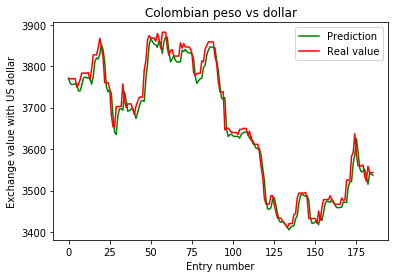

<Figure size 1296x1296 with 0 Axes>

In [27]:
plt.plot(y_hat, label='Prediction', color='green')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [28]:
mse = (np.mean((y_hat-y_tst)**2))**0.5
print(mse)

23.252849887451145


In [29]:
# For two days ahead forecast
days_ahead_forecast = 1
X_trn, y_trn = build_sequences(X, window_size, days_ahead_forecast)
print(X_trn.shape, y_trn.shape)
X_tst,y_tst = build_sequences(y, window_size, days_ahead_forecast)
print(X_tst.shape, y_tst.shape)
# Creating model
input_layer = k.layers.Input(X_trn.shape[1:])
hidden_layer = k.layers.CuDNNGRU(64, return_sequences=True)(input_layer)
hidden_layer = k.layers.CuDNNGRU(64)(hidden_layer)
output_layer = k.layers.Dense(1)(hidden_layer)
model = k.Model(inputs=input_layer, outputs=output_layer)
# Optimizer and checkpoint
checkpoint_path = "checkpoints/two_day.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

opt = k.optimizers.adam(lr=0.001)
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_trn, y_trn, epochs=15, batch_size=32, verbose=0, callbacks=[cp_callback])

(889, 14, 1) (889, 1)
(185, 14, 1) (185, 1)

Epoch 00001: saving model to checkpoints/two_day.ckpt

Epoch 00002: saving model to checkpoints/two_day.ckpt

Epoch 00003: saving model to checkpoints/two_day.ckpt

Epoch 00004: saving model to checkpoints/two_day.ckpt

Epoch 00005: saving model to checkpoints/two_day.ckpt

Epoch 00006: saving model to checkpoints/two_day.ckpt

Epoch 00007: saving model to checkpoints/two_day.ckpt

Epoch 00008: saving model to checkpoints/two_day.ckpt

Epoch 00009: saving model to checkpoints/two_day.ckpt

Epoch 00010: saving model to checkpoints/two_day.ckpt

Epoch 00011: saving model to checkpoints/two_day.ckpt

Epoch 00012: saving model to checkpoints/two_day.ckpt

Epoch 00013: saving model to checkpoints/two_day.ckpt

Epoch 00014: saving model to checkpoints/two_day.ckpt

Epoch 00015: saving model to checkpoints/two_day.ckpt


In [32]:
# Bringing back the values
y_hat = model.predict(X_tst)
y_hat = scaler.inverse_transform(y_hat)
y_tst = scaler.inverse_transform(y_tst)

<Figure size 1296x1296 with 0 Axes>

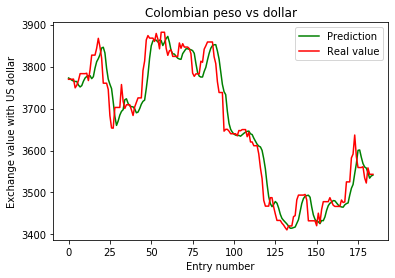

<Figure size 1296x1296 with 0 Axes>

In [33]:
plt.plot(y_hat, label='Prediction', color='green')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [34]:
mse = (np.mean((y_hat-y_tst)**2))**0.5
print(mse)

36.81482435948637


In [35]:
# Using one day forecast twice
model.load_weights("checkpoints/one_day.ckpt")
# Using first output in the input for a secong output
additional_input = model.predict(X_tst)
temp_X_tst = []
for new_i in range(len(additional_input)):
    temp_X_tst.append(np.append(X_tst[new_i][1:], additional_input[new_i]))
temp_X_tst = np.array(temp_X_tst)

In [36]:
temp_X_tst = np.expand_dims(temp_X_tst,-1)

<Figure size 1296x1296 with 0 Axes>

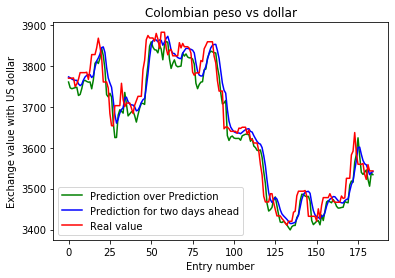

<Figure size 1296x1296 with 0 Axes>

In [37]:
y_hat2 = model.predict(temp_X_tst)
y_hat2 = scaler.inverse_transform(y_hat2)
plt.plot(y_hat2, label='Prediction over Prediction', color='green')
plt.plot(y_hat, label='Prediction for two days ahead', color='blue')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [42]:
mse1 = (np.mean((y_hat2-y_tst)**2))**0.5
print(f'The MSE for the first model is : {mse:.3}. For the second model is: {mse1:.3}')

The MSE for the first model is : 36.8. For the second model is: 35.5


## Dense <a nmae="dense">
This is the most common layer in neural networks. It is a linear combination for every neuron in the output with all the elements of the input. Every weight is optimized independently with gradient descend based on the loss function.

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(train_images.shape[1:])),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=200,
    epochs=5
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 53us/sample - loss: 1.8704 - acc: 0.3056 - val_loss: 1.7793 - val_acc: 0.3580
Epoch 2/5
50000/50000 [==============================] - 3s 53us/sample - loss: 1.8644 - acc: 0.3089 - val_loss: 1.7773 - val_acc: 0.3616
Epoch 3/5
50000/50000 [==============================] - 3s 53us/sample - loss: 1.8630 - acc: 0.3088 - val_loss: 1.7755 - val_acc: 0.3626
Epoch 4/5
50000/50000 [==============================] - 3s 53us/sample - loss: 1.8594 - acc: 0.3124 - val_loss: 1.7623 - val_acc: 0.3653
Epoch 5/5
50000/50000 [==============================] - 3s 54us/sample - loss: 1.8619 - acc: 0.3094 - val_loss: 1.7596 - val_acc: 0.3703
